Classification I

# Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
print(f" x = {x}")
print(f" y = {y}")

 x = [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
 y = [0 0 0 0 1 1 1 1 1 1]


In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [5]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [7]:
model.classes_

array([0, 1])

In [8]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
print(y)

[0 0 0 0 1 1 1 1 1 1]


In [11]:
y_pred = model.predict(x)
print(y_pred)

[0 0 0 1 1 1 1 1 1 1]


In [12]:
model.score(x, y)

0.9

## Confusion Matrix

In [13]:
matrix = confusion_matrix(y, model.predict(x))
matrix

array([[3, 1],
       [0, 6]], dtype=int64)

In [14]:
tn,fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 3 
False Positif (FP) : 1 
False Negatif (FN) : 0 
True Positif (TP) : 6 


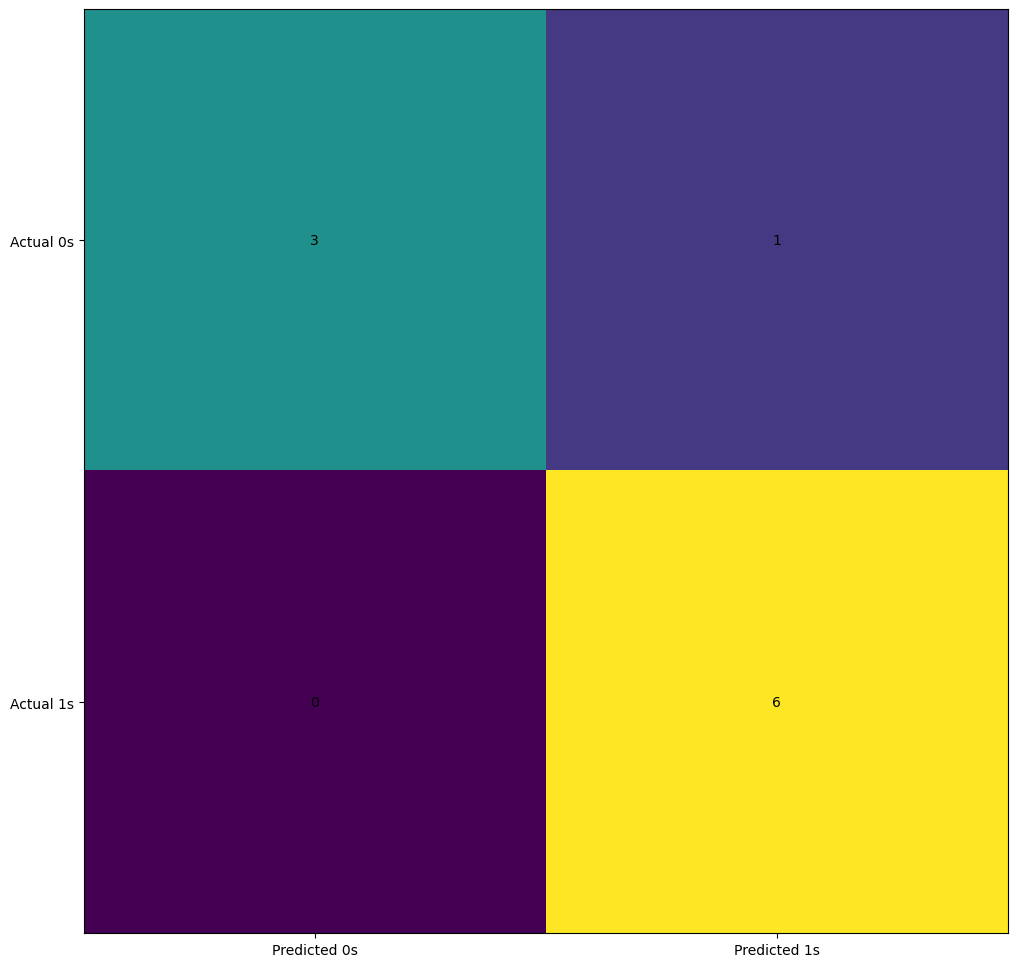

In [15]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [16]:
print(6 / (6 +1 ))
tp / (tp + fp)

0.8571428571428571


0.8571428571428571

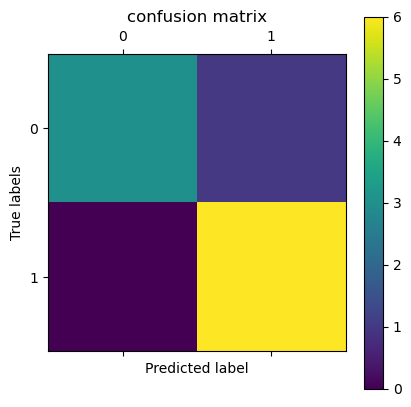

In [17]:
plt.matshow(matrix)
plt.colorbar()
plt.title('confusion matrix')
plt.xlabel("Predicted label")
plt.ylabel("True labels")
plt.show()

In [18]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## Precision Positive Predictive Value (PPV)

In [19]:
from sklearn.metrics import precision_score

round(precision_score(y, y_pred),2)

0.86

## Recall or True Positive (TPR) or Sensitivity

In [20]:
recall = tp / (tp +fn)
print(recall)

1.0


In [21]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

1.0

## F1-Score

In [22]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)

0.923076923076923

## Accuracy

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9

In [24]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [25]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [26]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [27]:
print(y)

[0 0 0 0 1 1 1 1 1 1]


In [28]:
model.score(x, y)

1.0

In [29]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [30]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Logistic Regression : Handwriting Recognition

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [32]:
digits = load_digits()

In [33]:
x, y = digits.data , digits.target

print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
plt.rcParams['figure.dpi'] = 50
plt.rcParams['savefig.dpi'] = 50

In [36]:
print(y_test[1])

7


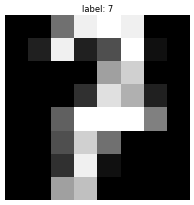

In [37]:
plt.imshow(x_test[1].reshape(8,8), cmap='gray')
plt.title(f"label: {y_test[1]}")
plt.axis('off')
plt.show()

In [38]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.        , -0.3469803 , -0.45911621, ...,  0.19705477,
        -0.50031699, -0.19153448],
       [ 0.        , -0.3469803 ,  0.16098666, ..., -0.48203459,
        -0.50031699, -0.19153448],
       [ 0.        , -0.3469803 ,  0.57438858, ..., -0.99135161,
        -0.50031699, -0.19153448],
       ...,
       [ 0.        , -0.3469803 ,  0.57438858, ...,  0.53659945,
        -0.50031699, -0.19153448],
       [ 0.        ,  9.05796294,  2.22799624, ..., -1.16112395,
        -0.50031699, -0.19153448],
       [ 0.        , -0.3469803 ,  0.36768762, ...,  1.55523349,
         3.46749665,  7.97901445]])

In [39]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [40]:
x_test = scaler.transform(x_test)

In [41]:
y_pred = model.predict(x_test)
y_pred

array([8, 7, 0, 8, 1, 1, 6, 5, 2, 0, 4, 2, 9, 1, 0, 7, 9, 3, 4, 1, 9, 8,
       9, 7, 3, 3, 5, 9, 9, 7, 0, 5, 6, 8, 5, 5, 5, 3, 4, 0, 0, 2, 0, 9,
       4, 5, 9, 1, 4, 2, 2, 5, 3, 5, 7, 5, 0, 3, 2, 7, 1, 5, 9, 4, 5, 9,
       6, 7, 0, 5, 6, 2, 2, 0, 9, 6, 9, 1, 7, 6, 1, 7, 9, 8, 2, 0, 2, 3,
       1, 1, 9, 2, 2, 8, 8, 4, 7, 2, 7, 7, 4, 5, 9, 9, 0, 4, 5, 0, 5, 8,
       1, 8, 3, 1, 9, 2, 2, 0, 2, 9, 5, 0, 9, 6, 3, 6, 0, 7, 8, 4, 0, 8,
       9, 1, 5, 4, 6, 9, 6, 1, 7, 3, 4, 0, 0, 4, 1, 6, 5, 6, 8, 4, 7, 6,
       7, 5, 0, 7, 7, 9, 6, 7, 4, 1, 5, 5, 6, 0, 5, 8, 2, 6, 5, 1, 2, 1,
       5, 3, 5, 4, 3, 4, 7, 4, 3, 9, 9, 5, 9, 7, 5, 5, 1, 6, 5, 1, 1, 6,
       0, 0, 2, 8, 5, 6, 3, 3, 9, 1, 3, 1, 8, 4, 4, 6, 5, 9, 4, 0, 9, 8,
       9, 9, 7, 6, 0, 9, 4, 2, 3, 5, 8, 4, 0, 4, 1, 9, 1, 7, 2, 7, 3, 7,
       9, 5, 7, 2, 2, 8, 0, 6, 0, 1, 9, 0, 6, 2, 1, 1, 9, 0, 7, 8, 7, 6,
       2, 6, 5, 5, 6, 8, 7, 8, 6, 2, 9, 0, 1, 8, 3, 7, 8, 6, 0, 7, 7, 6,
       5, 6, 0, 0, 5, 0, 2, 1, 4, 6, 1, 7, 9, 9, 1,

In [43]:
model.score(x_train, y_train)

0.9673826571201273

In [44]:
model.score(x_test, y_test)

0.9537037037037037

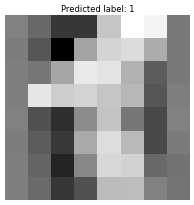

In [45]:
plt.imshow(x_test[5].reshape(8,8), cmap='gray')
plt.title(f"Predicted label: {y_pred[5]}")
plt.axis('off')
plt.show()

In [47]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0, 58,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 61,  1,  0],
       [ 0,  2,  1,  0,  0,  2,  1,  0, 45,  1],
       [ 1,  0,  0,  2,  0,  1,  0,  0,  2, 52]], dtype=int64)

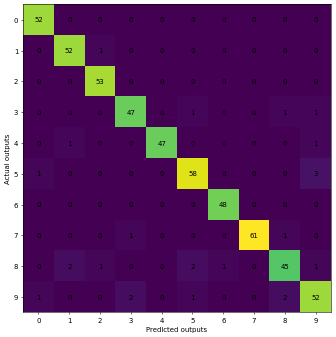

In [48]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       0.95      0.98      0.96        53
           2       0.96      1.00      0.98        53
           3       0.94      0.94      0.94        50
           4       1.00      0.96      0.98        49
           5       0.94      0.94      0.94        62
           6       0.98      1.00      0.99        48
           7       1.00      0.97      0.98        63
           8       0.92      0.87      0.89        52
           9       0.90      0.90      0.90        58

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



Accuracy: 0.97


C:\Users\sapphire\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


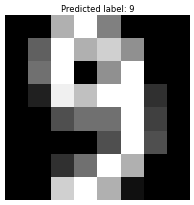

In [50]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot a sample image and its predicted label
plt.imshow(X_test[1].reshape(8,8), cmap='gray')
plt.title(f"Predicted label: {y_pred[1]}")
plt.axis('off')
plt.show()

# Logistic Regression : Beli Asuransi

In [51]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/asuransi_data.csv")
df.head(27)

,umur,beli_asuransi
0,21,0
1,24,0
2,47,1
3,52,0
4,45,1
5,57,1
6,55,0
7,60,1
8,62,1
9,61,1


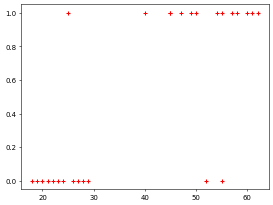

In [53]:
plt.scatter(df.umur,df.beli_asuransi,marker='+',color='red')

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['umur']],df.beli_asuransi,train_size=0.8)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_predicted = model.predict(X_test)

In [59]:
model.predict_proba(X_test)

array([[0.08726091, 0.91273909],
       [0.92823547, 0.07176453],
       [0.10775701, 0.89224299],
       [0.1195166 , 0.8804834 ],
       [0.35551379, 0.64448621],
       [0.90108721, 0.09891279]])

In [60]:
model.score(X_test,y_test)

1.0

In [61]:
X_test

,umur
7,60
19,18
17,58
5,57
23,45
0,21


In [62]:
y_predicted

array([1, 0, 1, 1, 1, 0], dtype=int64)

In [63]:
# model.coef = m 
m = model.coef_
print(model.coef_)

# model.intercept_ = B
b = model.intercept_
print(model.intercept_)

[[0.11684387]]
[-4.66308477]


In [64]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [65]:
def prediction_function(age):
    ## y=m*x + b 
    z = model.coef_ * model.intercept_
    y = sigmoid(z)
    return y

In [66]:
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[2, 0],
       [0, 4]], dtype=int64)

In [67]:
age = 35
prediction_function(age)

0.36705940518591873

In [68]:
age = 60
prediction_function(age)

0.36705940518591873

# Logistic Regression : Loan Prediction

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/pinjaman.csv')
df.head()

,Unnamed: 0,IdPinjaman,Jenis Kelamin,Menikah,Tanggungan,Pendidikan S1,Wiraswasta,Pengahasilan Utama,Pengahasilan Tambahan,Jumlah Pinjaman,Jangka Pinjaman,Kredit History,Area TempatTinggal,Status Pinjaman
0,0,LP001002,Pria,No,0,Lulus,Tidak,5849,0.0,NaN,360.0,1.0,Kota,Y
1,1,LP001003,Pria,Yes,1,Lulus,Tidak,4583,1508.0,128.0,360.0,1.0,Desa,N
2,2,LP001005,Pria,Yes,0,Lulus,Ya,3000,0.0,66.0,360.0,1.0,Kota,Y
3,3,LP001006,Pria,Yes,0,Tidak Lulus,Tidak,2583,2358.0,120.0,360.0,1.0,Kota,Y
4,4,LP001008,Pria,No,0,Lulus,Tidak,6000,0.0,141.0,360.0,1.0,Kota,Y


In [71]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [72]:
df.head()

,IdPinjaman,Jenis Kelamin,Menikah,Tanggungan,Pendidikan S1,Wiraswasta,Pengahasilan Utama,Pengahasilan Tambahan,Jumlah Pinjaman,Jangka Pinjaman,Kredit History,Area TempatTinggal,Status Pinjaman
0,LP001002,Pria,No,0,Lulus,Tidak,5849,0.0,NaN,360.0,1.0,Kota,Y
1,LP001003,Pria,Yes,1,Lulus,Tidak,4583,1508.0,128.0,360.0,1.0,Desa,N
2,LP001005,Pria,Yes,0,Lulus,Ya,3000,0.0,66.0,360.0,1.0,Kota,Y
3,LP001006,Pria,Yes,0,Tidak Lulus,Tidak,2583,2358.0,120.0,360.0,1.0,Kota,Y
4,LP001008,Pria,No,0,Lulus,Tidak,6000,0.0,141.0,360.0,1.0,Kota,Y


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IdPinjaman             614 non-null    object 
 1   Jenis Kelamin          614 non-null    object 
 2   Menikah                611 non-null    object 
 3   Tanggungan             599 non-null    object 
 4   Pendidikan S1          614 non-null    object 
 5   Wiraswasta             614 non-null    object 
 6   Pengahasilan Utama     614 non-null    int64  
 7   Pengahasilan Tambahan  614 non-null    float64
 8   Jumlah Pinjaman        592 non-null    float64
 9   Jangka Pinjaman        600 non-null    float64
 10  Kredit History         564 non-null    float64
 11  Area TempatTinggal     614 non-null    object 
 12  Status Pinjaman        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
df.shape

(614, 13)

## Data Cleansing

In [75]:
df.isnull().sum()

IdPinjaman                0
Jenis Kelamin             0
Menikah                   3
Tanggungan               15
Pendidikan S1             0
Wiraswasta                0
Pengahasilan Utama        0
Pengahasilan Tambahan     0
Jumlah Pinjaman          22
Jangka Pinjaman          14
Kredit History           50
Area TempatTinggal        0
Status Pinjaman           0
dtype: int64

In [77]:
df['Jumlah Pinjaman'] = df['Jumlah Pinjaman'].fillna(df['Jumlah Pinjaman'].mean())

In [78]:
df['Jumlah Pinjaman'].isnull().sum()

0

In [79]:
df['Kredit History'] = df['Kredit History'].fillna(df['Kredit History'].median())

In [80]:
df['Kredit History'].isnull().sum()

0

In [81]:
df['Kredit History'].isnull().sum()

0

In [82]:
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

IdPinjaman               0
Jenis Kelamin            0
Menikah                  0
Tanggungan               0
Pendidikan S1            0
Wiraswasta               0
Pengahasilan Utama       0
Pengahasilan Tambahan    0
Jumlah Pinjaman          0
Jangka Pinjaman          0
Kredit History           0
Area TempatTinggal       0
Status Pinjaman          0
dtype: int64

In [84]:
df.shape

(586, 13)

## Exploratory Data Analyst

<AxesSubplot:xlabel='Area TempatTinggal', ylabel='count'>

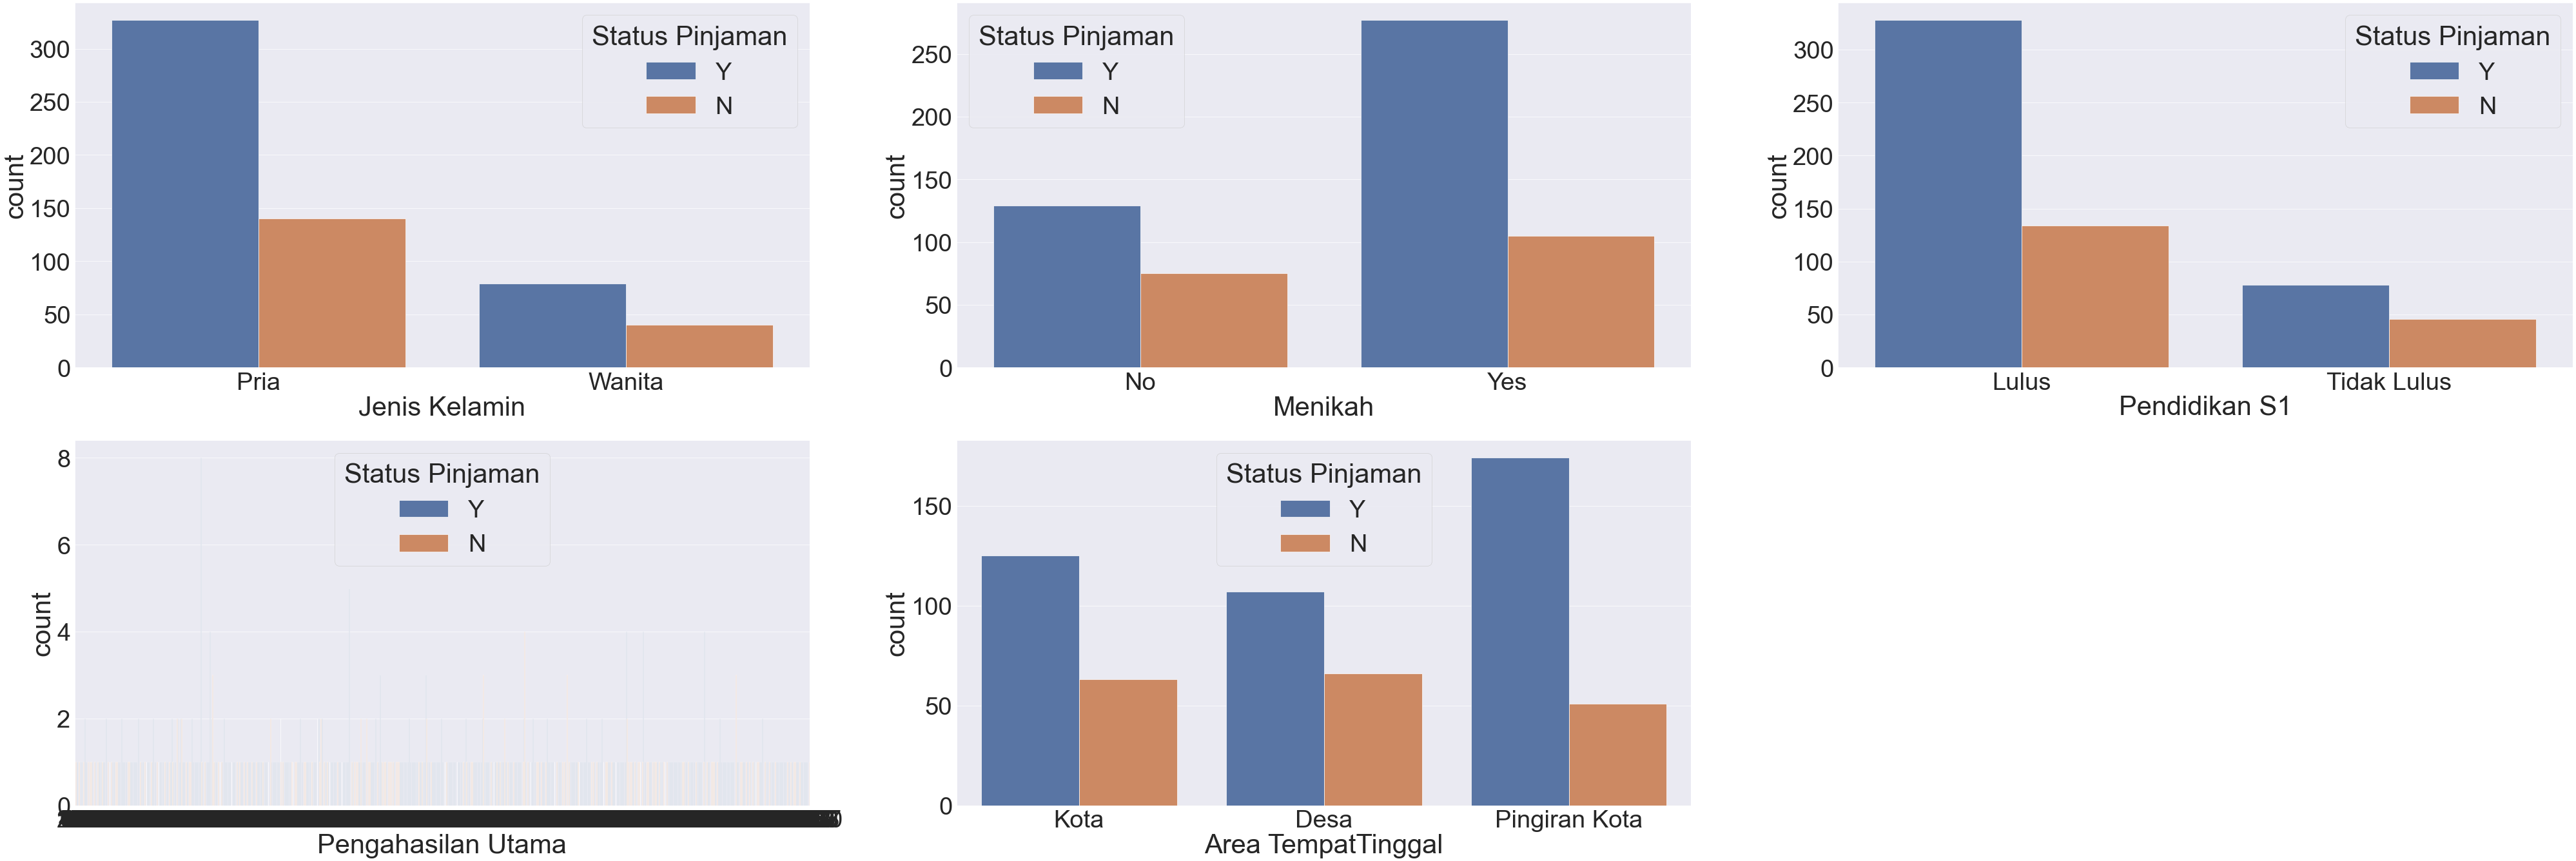

In [85]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Jenis Kelamin'],hue=df['Status Pinjaman'])

plt.subplot(332)
sns.countplot(df['Menikah'],hue=df['Status Pinjaman'])

plt.subplot(333)
sns.countplot(df['Pendidikan S1'],hue=df['Status Pinjaman'])

plt.subplot(334)
sns.countplot(df['Pengahasilan Utama'],hue=df['Status Pinjaman'])

plt.subplot(335)
sns.countplot(df['Area TempatTinggal'],hue=df['Status Pinjaman'])

In [86]:
df['Status Pinjaman'].replace('Y',1,inplace=True)
df['Status Pinjaman'].replace('N',0,inplace=True)

In [87]:
df['Status Pinjaman'].value_counts()

1    406
0    180
Name: Status Pinjaman, dtype: int64

In [89]:
df.head()

,IdPinjaman,Jenis Kelamin,Menikah,Tanggungan,Pendidikan S1,Wiraswasta,Pengahasilan Utama,Pengahasilan Tambahan,Jumlah Pinjaman,Jangka Pinjaman,Kredit History,Area TempatTinggal,Status Pinjaman
0,LP001002,Pria,No,0,Lulus,Tidak,5849,0.0,146.412162,360.0,1.0,Kota,1
1,LP001003,Pria,Yes,1,Lulus,Tidak,4583,1508.0,128.000000,360.0,1.0,Desa,0
2,LP001005,Pria,Yes,0,Lulus,Ya,3000,0.0,66.000000,360.0,1.0,Kota,1
3,LP001006,Pria,Yes,0,Tidak Lulus,Tidak,2583,2358.0,120.000000,360.0,1.0,Kota,1
4,LP001008,Pria,No,0,Lulus,Tidak,6000,0.0,141.000000,360.0,1.0,Kota,1


In [90]:
df['Jenis Kelamin']=df['Jenis Kelamin'].map({'Pria':1,'Wanita':0})
df['Jenis Kelamin'].value_counts()

1    467
0    119
Name: Jenis Kelamin, dtype: int64

In [91]:
df.Menikah=df.Menikah.map({'Yes':1,'No':0})
df['Menikah'].value_counts()

1    382
0    204
Name: Menikah, dtype: int64

In [92]:
df.Tanggungan=df.Tanggungan.map({'0':0,'1':1,'2':2,'3+':3})
df['Tanggungan'].value_counts()

0    334
1    101
2    101
3     50
Name: Tanggungan, dtype: int64

In [93]:
df['Pendidikan S1']=df['Pendidikan S1'].map({'Lulus':1,'Tidak Lulus':0})
df['Pendidikan S1'].value_counts()

1    462
0    124
Name: Pendidikan S1, dtype: int64

In [94]:
df.Wiraswasta=df.Wiraswasta.map({'Ya':1,'Tidak':0})
df['Wiraswasta'].value_counts()

0    507
1     79
Name: Wiraswasta, dtype: int64

In [95]:
df['Area TempatTinggal']=df['Area TempatTinggal'].map({'Kota':2,'Desa':0,'Pingiran Kota':1})
df['Area TempatTinggal'].value_counts()

1    225
2    188
0    173
Name: Area TempatTinggal, dtype: int64

In [96]:
df['Jumlah Pinjaman'].value_counts()

146.412162    20
120.000000    18
110.000000    16
100.000000    14
187.000000    12
              ..
72.000000      1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: Jumlah Pinjaman, Length: 204, dtype: int64

In [97]:
df['Jangka Pinjaman'].value_counts()

360.0    502
180.0     43
300.0     13
480.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Jangka Pinjaman, dtype: int64

In [98]:
df['Kredit History'].value_counts()

1.0    508
0.0     78
Name: Kredit History, dtype: int64

In [99]:
df.head()

,IdPinjaman,Jenis Kelamin,Menikah,Tanggungan,Pendidikan S1,Wiraswasta,Pengahasilan Utama,Pengahasilan Tambahan,Jumlah Pinjaman,Jangka Pinjaman,Kredit History,Area TempatTinggal,Status Pinjaman
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IdPinjaman             586 non-null    object 
 1   Jenis Kelamin          586 non-null    int64  
 2   Menikah                586 non-null    int64  
 3   Tanggungan             586 non-null    int64  
 4   Pendidikan S1          586 non-null    int64  
 5   Wiraswasta             586 non-null    int64  
 6   Pengahasilan Utama     586 non-null    int64  
 7   Pengahasilan Tambahan  586 non-null    float64
 8   Jumlah Pinjaman        586 non-null    float64
 9   Jangka Pinjaman        586 non-null    float64
 10  Kredit History         586 non-null    float64
 11  Area TempatTinggal     586 non-null    int64  
 12  Status Pinjaman        586 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 64.1+ KB


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [102]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=None)

In [105]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7852760736196319


In [106]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
y_test [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1]


# K-Nearest Neighbors with Sklearn

In [107]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

## Encoding Data Columns

In [108]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [109]:
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [110]:
features=list(zip(weather_encoded,temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [111]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted = model.predict([[1,0]]) # 0:Overcast, 2:Mild

print(predicted)

[1]


In [112]:
predicted = model.predict([[0,0]]) # 1:rain, 2:cold
print(predicted)

[1]


# K-Nearest Neighbors with Multiple Labels

In [115]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

## Exploring Data

In [114]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [116]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [117]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [118]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [119]:
print(wine.data.shape)

(178, 13)


In [120]:
print(wine.target.shape)

(178,)


In [121]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [122]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 2, 0, 0, 2, 2, 0])

In [123]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666
